In [ ]:
import numpy as np
import pandas as pd
import math
import re
import os
import statistics
from sklearn import preprocessing
import scipy.stats as stats
# import torch
!pip install mne
import mne
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from glob import glob
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from glob import glob
import scipy
from scipy.signal import butter, lfilter, convolve, boxcar
import tensorflow as tf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia-smi
tf.test.gpu_device_name()

Wed Apr 19 14:47:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |    373MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

'/device:GPU:0'

In [ ]:
bands = ['alpha', 'beta', 'delta', 'gamma1', 'gamma2']
# bands=['gamma1']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import time
start = time.time()

Mounted at /content/drive


In [ ]:
all_file_path=glob("/content/drive/MyDrive/edf_file_wajid_mumtaz/EO_wajid_mumtaz/EO-20230307T080254Z-001/EO//*.edf")
all_file_path1=glob("/content/drive/MyDrive/edf_file_wajid_mumtaz/EC_wajid_mumtaz/EC-20230324T194522Z-001/EC//*.edf")

In [ ]:
healthy_file_path=[i for i in all_file_path if 'H' in i.split('EO/')[1]] + [i for i in all_file_path1 if 'H' in i.split('EC/')[1]]

In [ ]:
depressed_file_path=[i for i in all_file_path if 'MDD' in i.split('EO/')[1]] + [i for i in all_file_path1 if 'MDD' in i.split('EC/')[1]]

In [ ]:
len(all_file_path)

62

In [ ]:
def read_data(file_path):
    print(file_path)
    raw_data = mne.io.read_raw_edf(file_path)
    raw_data.crop(tmin=0, tmax=180)

   
    window_len = 2  # seconds
    step_size = 2  # seconds

   
    num_samples = int((raw_data.times[-1] - window_len) / step_size) + 1

    
    segmented_data = np.zeros((num_samples, raw_data.info['nchan'], int(window_len * raw_data.info['sfreq'])))


    for i in range(num_samples):
        start_time = i * step_size
        end_time = start_time + window_len
        segment, _ = raw_data[:, int(start_time * raw_data.info['sfreq']):int(end_time * raw_data.info['sfreq'])]
        segmented_data[i, :, :] = segment.copy()
    # print(raw_data.info['sfreq'])
    return segmented_data


In [ ]:
lbl = []

In [ ]:
healthy_p=[]

for i in range(len(healthy_file_path)):
    sample_data=read_data(healthy_file_path[i])
    for j in range(len(sample_data)):
      lbl.append(1)
    # print(len(sample_data))
    healthy_p.append(sample_data)



/content/drive/MyDrive/EO-20230307T080254Z-001/EO/H S30 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/EO-20230307T080254Z-001/EO/H S30 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
/content/drive/MyDrive/EO-20230307T080254Z-001/EO/H S3 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/EO-20230307T080254Z-001/EO/H S3 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
/content/drive/MyDrive/EO-20230307T080254Z-001/EO/H S11 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/EO-20230307T080254Z-001/EO/H S11 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
/content/drive/MyDrive/EO-20230307T080254Z-001/EO/H S15 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/EO-20230307T080254Z-001/EO/H S15 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
/content/drive/MyDrive/EO-2023

In [ ]:
new_arr = [[0 for j in range(len(healthy_p[0]))] for i in range(len(healthy_p))]
for i in range(len(healthy_p)):
    for j in range(len(healthy_p[i])):
        arr = np.asarray(healthy_p[i][j])
        # print(arr[:19,].shape)
        new_arr[i][j]=arr[:19,]

In [ ]:
healthy_pat=new_arr

In [ ]:
depressed_p=[]
for i in range(len(depressed_file_path)):
    sample_data=read_data(depressed_file_path[i])
    for j in range(len(sample_data)):
      # pid.append(re.findall('/(.*) ',depressed_file_path[i]))
      # rfp.append(depressed_file_path[i])
      lbl.append(0)
    depressed_p.append(sample_data)

/content/drive/MyDrive/EO-20230307T080254Z-001/EO/MDD S26 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/EO-20230307T080254Z-001/EO/MDD S26 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
/content/drive/MyDrive/EO-20230307T080254Z-001/EO/MDD S27 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/EO-20230307T080254Z-001/EO/MDD S27 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
/content/drive/MyDrive/EO-20230307T080254Z-001/EO/MDD S28 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/EO-20230307T080254Z-001/EO/MDD S28 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
/content/drive/MyDrive/EO-20230307T080254Z-001/EO/MDD S19 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/EO-20230307T080254Z-001/EO/MDD S19 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
/content/dri

In [ ]:
new_arr = [[0 for j in range(len(depressed_p[0]))] for i in range(len(depressed_p))]
for i in range(len(depressed_p)):
    for j in range(len(depressed_p[i])):
        arr = np.asarray(depressed_p[i][j])
        # print(arr[:19,].shape)
        new_arr[i][j]=arr[:19,]

In [ ]:
len(lbl)

10710

In [ ]:
depressed_pat=new_arr

In [ ]:
depressed_data=[]
for i in range(len(depressed_pat)):
    for j in range(len(depressed_pat[i])):
        sample=depressed_pat[i][j]
        depressed_data.append(sample)

In [ ]:
healthy_data=[]
for i in range(len(healthy_pat)):
    for j in range(len(healthy_pat[i])):
        sample=healthy_pat[i][j]
        healthy_data.append(sample)

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def filter_signal(signal, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

In [ ]:
fs = 256 # Sampling rate
lowcut = {}
highcut = {}
lowcut['alpha'], highcut['alpha'] = 8, 13 # Alpha frequency range
lowcut['beta'], highcut['beta'] = 13, 30 # Beta frequency range
lowcut['gamma1'], highcut['gamma1'] = 31, 50 # Gamma1 frequency range
lowcut['gamma2'], highcut['gamma2'] = 51, 70 # Gamma2 frequency range
lowcut['delta'], highcut['delta'] = 0.5, 4 # Delta frequency range
from scipy.signal import butter, filtfilt

In [ ]:
H_all = {}
for x in bands:
  H_all[x] = []
for signal in healthy_data:
  for x in bands:
    H_all[x].append(filter_signal(signal, lowcut[x], highcut[x], fs))


In [ ]:
np.asarray(H_all['gamma1']).shape

(5220, 19, 512)

In [ ]:
D_all = {}
for x in bands:
  D_all[x] = []
for signal in depressed_data:
  for x in bands:
    D_all[x].append(filter_signal(signal, lowcut[x], highcut[x], fs))


In [ ]:
np.asarray(D_all['gamma1']).shape

(5490, 19, 512)

graph function

In [ ]:
import numpy as np
import math
import pandas as pd
from sklearn.cluster import KMeans
import os
from sklearn.metrics import adjusted_rand_score, silhouette_score, adjusted_mutual_info_score, normalized_mutual_info_score, confusion_matrix, calinski_harabasz_score, davies_bouldin_score
from sklearn import metrics
from scipy.special import comb
from scipy.sparse.linalg import eigsh, eigs
from scipy.sparse import csr_matrix, diags, coo_matrix, lil_matrix
import scipy.linalg as LA
from scipy.spatial import distance
from matplotlib import pyplot as plt
from scipy.sparse.csgraph import minimum_spanning_tree
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from operator import itemgetter
class Graph: 
  
    def __init__(self, NoOfNode,vertices): 
        self.V= NoOfNode
        self.vertices =  vertices
        self.graph = []
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 

    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1

    def KruskalMST(self, isList=True): 
        # global T1, T2, TT1, TT2, TTT1, TTT2, TF1, TF2, TU1, TU2
        result =[] 
        i = 0
        e = 0 
        if isList:
          # ti = time.time()
          self.graph =  sorted(self.graph,key=itemgetter(2)) 
          # T1 += time.time() - ti
        else:
          # ti = time.time()
          self.graph = np.sort(self.graph, order='w')
          # self.graph =  sorted(self.graph,key=itemgetter(2))
          # T2 += time.time() - ti
        parent = {} ; rank = {} 
        # ti = time.time()
        for node in self.vertices: 
            parent[node] = node 
            rank[node] = 0 
        # if isList:
        #   TT1 += time.time() - ti
        # else:
        #   TT2 += time.time() - ti

        # ti = time.time()
        while e < self.V -1 : 
            u,v,w =  self.graph[i] 
            # if not isList:
            #   print(type(u))
            # u,v = int(u),int(v)
            i = i + 1
            # ti1 = time.time()
            x = self.find(parent, u) 
            y = self.find(parent ,v) 
            # if isList:
            #   TF1 += time.time() - ti1
            # else:
            #   TF2 += time.time() - ti1
            if x != y: 
                e = e + 1     
                # ti1 = time.time()
                result.append([u,v]) 
                self.union(parent, rank, x, y)
                # if isList:
                #   TU1 += time.time() - ti1
                # else:
                #   TU2 += time.time() - ti1
                  
        # if isList:
        #   TTT1 += time.time() - ti
        # else:
        #   TTT2 += time.time() - ti
        # sd,sf,wt=[],[],[]
        # for u,v,weight  in result: 
        #    sd.append(u)
        #    sf.append(v)
        #    wt.append(weight)

        return result  

# def KruskalAlgorithm(points_between,dist,NoOfNode, vertices):
#   g = Graph(NoOfNode, vertices) 
#   for i in range(len(points_between)):
#     p1=points_between[i][0]
#     p2=points_between[i][1]
#     distance=dist[i]
#     g.addEdge(p1, p2, distance)  
#   u,v,w=g.KruskalMST()
#   return u,v,w

def KruskalAlgorithmConnected(X, S, n):
  g = Graph(n, S)
  X_s = X[S]
  weights = distance.cdist(X_s, X_s)
  for i in range(n):
    for j in range(i + 1, n):
      g.addEdge(S[i], S[j], weights[i][j])
  return g.KruskalMST()

def KruskalAlgorithmCentroids(centroids, centroids_indexes, n):
  g = Graph(n, centroids_indexes)
  weights = distance.cdist(centroids, centroids)
  for i in range(n):
    for j in range(i + 1, n):
      g.addEdge(centroids_indexes[i], centroids_indexes[j], weights[i][j])
  return g.KruskalMST()

In [ ]:
def get_sim_graph(X, N, k, num_features, num_rounds_neighbors=2, num_rounds=2):
    # partitioning and representative points
    P = []
    centroids = []
    farthest_points1 = []
    farthest_points2 = []
    vertices = np.arange(N, dtype=int)
    bi_means_devide(X, vertices, k, P, centroids, farthest_points1, farthest_points2)
    n = len(centroids)
    
    farthest_points1_arr = np.array(farthest_points1)
    farthest_points2_arr = np.array(farthest_points2)
    centroids_arr = np.array(centroids)
    
    R = np.hstack((centroids_arr, farthest_points1_arr, farthest_points2_arr)) # representative points od each partition
    R = R.reshape((R.shape[0], 3, R.shape[1] // 3))
  
    # computing neighboring partitions
    cen_distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            dist_arr = distance.cdist(R[i], R[j])
            d = dist_arr.min()
            d_index = dist_arr.argmin()
            cen_distances[i][j] = d
            cen_distances[j][i] = d

    _MST_CEN_1 = coo_matrix(minimum_spanning_tree(cen_distances))
    cen_distances[_MST_CEN_1.row, _MST_CEN_1.col] = 0
    cen_distances[_MST_CEN_1.col, _MST_CEN_1.row] = 0
    Edges_single =  _MST_CEN_1.data
    MST1 = np.hstack(( _MST_CEN_1.row.reshape(n - 1, 1), _MST_CEN_1.col.reshape(n - 1, 1) ))
    
    try:
        _MST_CEN_2 = coo_matrix(minimum_spanning_tree(cen_distances))
        Edges_single =  _MST_CEN_2.data
        MST2 = np.hstack(( _MST_CEN_2.row.reshape(n - 1, 1), _MST_CEN_2.col.reshape(n - 1, 1) ))
        
        NP = np.concatenate((MST1, MST2)) # neighboring partitions
    except:
        NP = MST1
    
    G_L = csr_matrix((N, N))

    # computing IPM for each neighboring partitions
    for subset_pairs in NP:
        i, j = subset_pairs[0], subset_pairs[1]
        subset_i, subset_j = P[i], P[j]

        subset = np.array(subset_i + subset_j)
        _n = len(subset)
        X_s = X[subset]

        D = distance.cdist(X_s, X_s)

        MST1 = coo_matrix(minimum_spanning_tree(D))
        MST_1_weights = MST1.data
        # print(subset, MST1.row)
        # print(subset[MST1.row])
        D[MST1.row, MST1.col] = 0
        D[MST1.col, MST1.row] = 0
        MST1 = np.hstack(( subset[MST1.row].reshape(_n - 1, 1), subset[MST1.col].reshape(_n - 1, 1) ))

        try:
            MST2 = coo_matrix(minimum_spanning_tree(D))
            MST_2_weights = MST2.data
            MST2 = np.hstack(( subset[MST2.row].reshape(_n - 1, 1), subset[MST2.col].reshape(_n - 1, 1) ))
            IPM = np.concatenate((MST1, MST2)) # Inter-partition MST
            IPM_weights = np.concatenate((MST_1_weights, MST_2_weights))
        except:
            # print(_i, "graph disconnected")
            IPM = MST1
            IPM_weights = MST_1_weights
        
        G_L[IPM[:, 0], IPM[:, 1]] = IPM_weights
        G_L[IPM[:, 1], IPM[:, 0]] = IPM_weights

        
    # 2-rounds MST
    MST1 = coo_matrix(minimum_spanning_tree(G_L))
    MST1_weights = MST1.data
    G_L[MST1.row, MST1.col] = 0
    G_L[MST1.col, MST1.row] = 0
    G_L.eliminate_zeros()
    MST1 = np.hstack(( MST1.row.reshape(N - 1, 1), MST1.col.reshape(N - 1, 1) ))

    try:
        MST2 = coo_matrix(minimum_spanning_tree(G_L))
        MST2_weights = MST2.data
        MST2 = np.hstack(( MST2.row.reshape(N - 1, 1), MST2.col.reshape(N - 1, 1) ))
        MST_2 = np.concatenate((MST1, MST2)) # neighboring partitions
        MST_2_weights = np.concatenate((MST1_weights, MST2_weights))
    except:
        # print("LNG graph disconnected")
        MST_2 = MST1
        MST_2_weights = MST1_weights
    
    
    # computing adjacency matrix
    A = csr_matrix((N, N))
    A[MST_2[:, 0], MST_2[:, 1]] = MST_2_weights
    A[MST_2[:, 1], MST_2[:, 0]] = MST_2_weights

    MSTW_2 = []

    for i in range(len(MST_2)):
      MSTW_2.append([MST_2[i][0], MST_2[i][1], MST_2_weights[i]])

    return G_L, MST_2, A, MSTW_2

In [ ]:
def get_sim_graph_2(X, N, k, num_features, is_show_running_time = False, is_plot=False, partitionining_method='bi_means', num_rounds_mst_cen=2, num_rounds=2):
  before_time = time.time()
  if partitionining_method == 'bi_means':
    S_bi_means = []
    centroids = []
    farthest_points1 = []
    farthest_points2 = []
    vertices = [i for i in range(N)]
    bi_means_devide(X, vertices, k, S_bi_means, centroids, farthest_points1, farthest_points2)
  else:
    S_bi_means, centroids = devide(X, k)
    centroids = []
    farthest_points1 = []
    farthest_points2 = []
    for X_indices in S_bi_means:
      X_partition = X[X_indices]
      n = len(X_indices)
      center = X_partition.mean(axis=0)

      distances = distance.cdist([center], X_partition)
      p_index = distances[0].argmax() # farthest point from c

      distances = distance.cdist([X_partition[p_index]], X_partition)
      q_index = distances[0].argmax() # farthest point from p

      distances = distance.cdist(X_partition, [X_partition[p_index], X_partition[q_index]])
      X_p = []
      X_q = []
      for i in range(n):
        if distances[i][0] < distances[i][1]:
          X_p.append(X_indices[i])
        else:
          X_q.append(X_indices[i])
      # S.append(X_indices)
      centroids.append(X[X_indices].mean(axis=0))
      farthest_points1.append(X[X_p].mean(axis=0))
      farthest_points2.append(X[X_q].mean(axis=0))
      
    vertices = [i for i in range(N)]
    
  GLN = Graph(N, vertices)
  farthest_points1_arr = np.array(farthest_points1)
  farthest_points2_arr = np.array(farthest_points2)
  centroids_arr = np.array(centroids)
  centers = np.hstack((centroids_arr, farthest_points1_arr, farthest_points2_arr))
  centers = centers.reshape((centers.shape[0], 3, centers.shape[1] // 3))
  edge2Mid = {}
  if is_plot:
    print(len(farthest_points1), len(farthest_points2), centers.shape)
    
    # print(centers)
    plt.figure(figsize=(14,11))
    # plot_clusters_bimeans(X, S_bi_means, text="partition using bi means")
    for i in range(len(centroids)):
      subset = S_bi_means[i]
      plt.scatter(X[subset,0], X[subset,1], marker = markers[i % len(markers)] , color = marker_colors[i], s=400)
    # plt.scatter(centers[:, 0, 0], centers[:, 0, 1], color="C0", s=300)
    # plt.scatter(centers[:, 1, 0], centers[:, 1, 1], color="C0", s=300)
    # plt.scatter(centers[:, 2, 0], centers[:, 2, 1], color="C0", s=300)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.savefig('partitions.eps', format='eps')
    plt.show()
  n = len(centroids)
  # print(n, k)
  cen_vertices = [i for i in range(n)]
  cen_distances = np.zeros((n, n))
  for i in range(n):
    for j in range(i + 1, n):
      dist_arr = distance.cdist(centers[i], centers[j])
      d = dist_arr.min()
      d_index = dist_arr.argmin()
      cen_distances[i][j] = d
      cen_distances[j][i] = d
      edge2Mid[str(i) + " " + str(j)] = [centers[i][d_index // 3], centers[j][d_index % 3]]

  # FINAL_MST_CEN = []
  cen_edges = set()

  _ite = 0
  while _ite < num_rounds_mst_cen:
    G_cen = Graph(n, cen_vertices)
    
    for _i in range(n):
      for _j in range(_i + 1, n):
        if cen_distances[_i][_j] != 0:
          G_cen.addEdge(_i, _j, cen_distances[_i][_j])
    try:
      _MST_CEN = G_cen.KruskalMST()
      # FINAL_MST_CEN.append(_MST_CEN)
      for edge in _MST_CEN:
        u, v = edge
        if u <= v:
          cen_edges.add(str(u) + " " + str(v))
        else:
          cen_edges.add(str(v) + " " + str(u))
        cen_distances[u][v] = 0
        cen_distances[v][u] = 0
    except:
      print("cen graph disconnected")
      break
    _ite += 1

  MST_CEN = []
  G_cen_li = [set() for i in range(n)]

  for edge in cen_edges:
    u, v = [int(i) for i in edge.split()]
    G_cen_li[u].add(v)
    G_cen_li[v].add(u)
    
    MST_CEN.append([u, v])

  if is_plot:
    
    plt.figure(figsize=(14, 11))
    # plot_clusters_bimeans(X, S_bi_means, text="partition using bi means")
    print("YES")
    for i in range(len(centroids)):
      subset = S_bi_means[i]
      plt.scatter(X[subset,0], X[subset,1], marker = markers[i % len(markers)] , color = marker_colors[i], s=400)
    plt.scatter(centers[:, 0, 0], centers[:, 0, 1], color="black", s=250)
    # plt.scatter(centers[:, 1, 0], centers[:, 1, 1], color="red")
    # plt.scatter(centers[:, 2, 0], centers[:, 2, 1], color="red")
    # co = 0
    for edge in MST_CEN:
      u, v = edge
      plt.plot([centroids[u][0], centroids[v][0]], [centroids[u][1], centroids[v][1]], color="black", linewidth=6)
      # plt.text((centroids[u][0] + centroids[v][0]) / 2, (centroids[u][1] + centroids[v][1]) / 2, str(co), color="red", fontsize=22)
      # co += 1
      
      # plt.text(centroids[u][0], centroids[u][1], str(u), color="red", fontsize=44)
      # plt.text(centroids[v][0], centroids[v][1], str(v), color="red", fontsize=44)
      
      
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.savefig('neighboring-partitions.eps', format='eps')
    
    plt.show()

  FINAL_MSTs = []
  test = []
  # __u, __v = MST_CEN[ind_no]
  __u, __v = [15, 16]
  
  # tt1 = 0;tt2 = 0;tt3 = 0
  for subset_pairs in MST_CEN:
    i, j = subset_pairs[0], subset_pairs[1]
    subset_i, subset_j = S_bi_means[i], S_bi_means[j]

    subset = subset_i + subset_j
    X_s = X[subset]

    D = distance.cdist(X_s, X_s)
    # print(D.dtype)

    id2index = {}
    n_ = len(subset_i) + len(subset_j)

    for index in range(n_):
      id2index[subset[index]] = index

    vertices_pairs = np.indices((n_, n_))
    bool_ind = vertices_pairs[0] < vertices_pairs[1]
    subset_arr = np.array(subset)
    ite = 0
    while ite < num_rounds:
      # t1 = time.time()
      g = Graph(n_, subset)
      # for _i in range(n_):
      #   for _j in range(_i + 1, n_):
      #     if D[_i][_j] != 0:
      #       g.addEdge(subset[_i], subset[_j], D[_i][_j])
      #       # l_u.append(subset[_i])
      #       # l_v.append(subset[_j])
      #       # l_d.append(D[_i][_j])
      pairs_indices = np.where(bool_ind == True)
      l = len(pairs_indices[0])
      # print(type(g.graph[0][0]),type(g.graph[0][1]),type(g.graph[0][2]))
      # tt1 += time.time() - t1
      # t2 = time.time()
      g.graph = np.zeros(l, dtype={'names':('u','v','w'), 'formats':(subset_arr.dtype, subset_arr.dtype, D.dtype)})
      # print(g.graph.dtype)
      # return
      g.graph['u'] = subset_arr[pairs_indices[0]]
      g.graph['v'] = subset_arr[pairs_indices[1]]
      g.graph['w'] = D[pairs_indices[0],pairs_indices[1]]
      # print(type(g.graph[0][0]),type(g.graph[0][1]),type(g.graph[0][2]))
      # g.graph = g.graph.tolist()
      # print(type(g.graph[0][0]),type(g.graph[0][1]),type(g.graph[0][2]))
      # return
      # tt2 += time.time() - t2
      # g.graph = a
      # print(l)
      try:
        # t3 = time.time()
        MST_ = g.KruskalMST(isList=False)
        # tt3 += (time.time() - t3)
        FINAL_MSTs.append(MST_)
        if (i == __u and j == __v) or (i == __v and j == __u):
          test += MST_

        for edge in MST_:
          u, v = edge
          D[id2index[u]][id2index[v]] = 0
          D[id2index[v]][id2index[u]] = 0
          bool_ind[id2index[u]][id2index[v]] = False
          bool_ind[id2index[v]][id2index[u]] = False
      except:
        print("graph disconnected")
        break

      ite += 1
  
  g = Graph(N, vertices)
  edges = set()
  for MST in FINAL_MSTs:
    for edge in MST:
      if edge[0] < edge[1]:
        edges.add(str(edge[0]) + " " + str(edge[1]))
      else:
        edges.add(str(edge[1]) + " " + str(edge[0]))
  for edge in edges:
    i, j = edge.split()
    i, j = int(i), int(j)
    g.addEdge(i, j, distance.euclidean(X[i], X[j]))
  
  LNG = g.graph
  A = lil_matrix((N, N))
  # DIST = distance.cdist(X, X)
  vertices = [_i for _i in range(N)]
  MST_PLOT = []
  ite = 0
  DIST = [{} for i in range(N)]
  for edge in LNG:
    u, v, d = edge
    # d = distance.euclidean(X[u], X[v])
    DIST[u][v] = d
    DIST[v][u] = d
    
  MST_K = []
  while ite < num_rounds:
    g = Graph(N, vertices)
    try:
      for u in range(N):
        for v in DIST[u]:
          if DIST[u][v] != -1:
            g.addEdge(u, v, DIST[u][v])
      MST = g.KruskalMST()
      # print(ite)
      MST_PLOT += MST
      for edge in MST:
        u, v = edge
        A[u, v] = DIST[u][v]
        A[v, u] = DIST[u][v]
        MST_K.append([u, v, DIST[u][v]])
        DIST[u][v] = -1
        DIST[v][u] = -1
      ite += 1
    except:
      print(ite, "round not possible")
      break

  if is_plot:
    plt.figure(figsize=(7,5.5))
    # plot_graph(X, LNG)
    # sdlkfjdsf

    plt.figure(figsize=(14, 11))
    # plot_clusters_bimeans(X, S_bi_means, text="partition using bi means")
    # u,v = MST_CEN[0]

    for edge in test:
      u, v = edge
      plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], color="C0", linewidth=8, zorder=1)

    __i = 0
    markers_2 = ['v', 'h']
    for i in [__u, __v]:
      subset = S_bi_means[i]
      plt.scatter(X[subset,0], X[subset,1], marker = markers_2[(__i) % len(markers)] , color = marker_colors_2[__i], s=1800, zorder=2)
      __i += 1

    plt.plot([2, 7], [22,17], color="black", linewidth=6, linestyle="dashed", zorder=-1)
    plt.text(3.75, 21.25, "P1", fontsize=60)
    plt.text(4.25, 17.45, "P2", fontsize=60)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.savefig('IPM.eps', format='eps')
    plt.show()

    plt.figure(figsize=(14,11))
    # plot_clusters_bimeans(X, S_bi_means, text="partition using bi means")
    # u,v = MST_CEN[0]

    # for edge in test:
    #   u, v = edge
    #   plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], color="C0", linewidth=5, zorder=-1)

    __i = 0
    for i in [__u, __v]:
      subset = S_bi_means[i]
      plt.scatter(X[subset,0], X[subset,1], marker = markers_2[(__i) % len(markers)] , color = marker_colors_2[__i], s=1800, zorder=0)
      __i += 1
    
    plt.plot([2, 7], [21.75,17], color="black", linewidth=2.5, linestyle="dashed", zorder=-1)
    # plt.plot([centers[__u, 1, 0], centers[__v, 2, 0]], [centers[__u, 1, 1], centers[__v, 2, 1]], color="C0", linewidth=8)
    # plt.plot([centers[__u, 0, 0], centers[__v, 0, 0]], [centers[__u, 0, 1], centers[__v, 0, 1]], color="red", linewidth=8, zorder=1)

    plt.scatter([centers[__u, 0, 0]], [centers[__u, 0, 1]], s=700, color="C0", zorder=2)
    plt.scatter([centers[__u, 1, 0]], [centers[__u, 1, 1]], s=700, color="C0")
    plt.scatter([centers[__u, 2, 0]], [centers[__u, 2, 1]], s=700, color="C0")

    plt.scatter(centers[__v, 0, 0], centers[__v, 0, 1], s=700, color="C0", zorder=2)
    plt.scatter(centers[__v, 1, 0], centers[__v, 1, 1], s=700, color="C0")
    plt.scatter(centers[__v, 2, 0], centers[__v, 2, 1], s=700, color="C0")    
    plt.text(3.75, 21.25, "P1", fontsize=60)
    plt.text(4.25, 17.45, "P2", fontsize=60)
    

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.savefig('rep-points.eps', format='eps')
    plt.show()

  # return

  
  
  # if is_plot:
  #   plt.figure(figsize=(25,15))
  #   plot_graph(X, MST)
  #   dl;k
  return LNG, A, MST_K

In [ ]:
def bi_means_devide(X, X_indices, k, P, centroids, farthest_points1, farthest_points2):
  N = len(X_indices)
  X_partition = X[X_indices]

  if N > k: # base condition
    X_indices_arr = np.array(X_indices)
    center = X_partition.mean(axis=0) # centroid of the partition

    distances = distance.cdist([center], X_partition)
    c_index = distances[0].argmin() #closest point from centeroid

    distances = distance.cdist([X_partition[c_index]], X_partition)
    p_index = distances[0].argmax() # farthest point from c

    distances = distance.cdist([X_partition[p_index]], X_partition)
    q_index = distances[0].argmax() # farthest point from p

    # spliting of a partition into two sub-partitions
    distances = distance.cdist(X_partition, [X_partition[p_index], X_partition[q_index]])

    min_i = distances.argmin(axis = 1)
    
    p_min_Is = np.where(min_i == 0)[0]
    q_min_Is = np.where(min_i == 1)[0]
    
    # recursively calling bi_means_devide for the sub-partitions
    bi_means_devide(X, X_indices_arr[p_min_Is], k, P, centroids, farthest_points1, farthest_points2)
    bi_means_devide(X, X_indices_arr[q_min_Is], k, P, centroids, farthest_points1, farthest_points2)
  else:
    P.append(X_indices.tolist()) # adding the partition

    # finding of representative points
    center = X_partition.mean(axis=0)

    distances = distance.cdist([center], X_partition)
    p_index = distances[0].argmax() # farthest point from c

    distances = distance.cdist([X_partition[p_index]], X_partition)
    q_index = distances[0].argmax() # farthest point from p

    distances = distance.cdist(X_partition, [X_partition[p_index], X_partition[q_index]])
    min_i = distances.argmin(axis = 1)

    p_min_Is = np.where(min_i == 0)[0]
    q_min_Is = np.where(min_i == 1)[0]

    X_p = X_partition[p_min_Is]
    X_q = X_partition[q_min_Is]
    
    centroids.append(center) # first representative point

    if len(X_p) == 0:
      farthest_points1.append(center)
    else:
      farthest_points1.append(X_p.mean(axis=0)) # second representative point
    if len(X_q) == 0:
      farthest_points2.append(center)
    else:
      farthest_points2.append(X_q.mean(axis=0)) # third representative point

In [ ]:
all_data = {}
for x in bands:
  all_data[x] = H_all[x] + D_all[x]


In [ ]:
np.asarray(all_data['gamma1']).shape

(10710, 19, 512)

In [ ]:
SGW = {}
for x in bands:
  SGW[x] = []

for x in all_data:
  for i in range(len(all_data[x])):
    N, num_features = all_data[x][i].shape
    k = math.ceil(N ** 0.5)
    G_L, SG, A, SG_W = get_sim_graph(np.array(all_data[x][i]), N, k,num_features)
    SGW[x].append(SG_W)

In [ ]:
for x in bands:
  print(x)
  print(np.asarray(SGW[x]).shape)
  print(len(SGW[x][0]))
  print(len(SGW[x][0][0]))
  print(SGW[x][0][0][1],SGW[x][0][0][0],SGW[x][0][0][2])

gamma1
(10710,)
36
3
9 0 1.0085396546880904e-05


In [ ]:
from scipy.sparse.csgraph import laplacian
weight_matrix = {}
for x in bands:
  weight_matrix[x] = []

for x in bands:
  for i in range(len(SGW[x])):
    matrix=np.zeros((19,19))    #intializing weight matrix
    for j in range(len(SGW[x][i])):
      matrix[SGW[x][i][j][0]][SGW[x][i][j][1]]=SGW[x][i][j][2]
      matrix[SGW[x][i][j][1]][SGW[x][i][j][0]]=SGW[x][i][j][2]
    matrix=laplacian(matrix)
    weight_matrix[x].append(matrix)

for x in bands:
  print(len(weight_matrix[x]))

10710


In [ ]:
len(weight_matrix['gamma1'])

10710

In [ ]:
zscore_signal = stats.zscore(H_all["gamma1"][0], axis=0)

In [ ]:
H_all["gamma1"][0]

array([[ 2.44746711e-08,  1.53435867e-07,  3.17361055e-08, ...,
         9.46433927e-08,  1.21043848e-07,  2.77458983e-08],
       [ 6.86873240e-08,  4.03393122e-07,  3.04728432e-07, ...,
        -2.19490923e-07, -2.31127871e-07, -3.89529687e-08],
       [ 1.11486968e-08, -7.98579493e-09, -5.02804059e-08, ...,
         3.95801326e-07,  2.74958216e-07,  2.35260226e-08],
       ...,
       [-1.72408874e-08, -8.54453362e-08,  3.26581436e-08, ...,
        -2.50296433e-07, -2.32128682e-07,  2.52641895e-08],
       [-2.42203013e-11,  5.98774181e-07,  7.51471841e-07, ...,
         6.80086283e-08,  5.14792887e-08,  9.23179692e-08],
       [-3.43064009e-08,  9.56927673e-10,  5.26088177e-08, ...,
        -2.47359376e-07, -2.42098473e-07,  4.97235456e-08]])

In [ ]:
zscore_signal

array([[ 0.56852186,  0.02969071, -0.25835263, ...,  0.98276239,
         1.13596926,  0.14844673],
       [ 1.76502233,  0.5507199 ,  0.25686141, ...,  0.21137009,
         0.14722573, -1.11726509],
       [ 0.20788902, -0.30678842, -0.41314108, ...,  1.72228971,
         1.56809322,  0.06836821],
       ...,
       [-0.56040124, -0.46825076, -0.25661248, ...,  0.13572368,
         0.14441589,  0.10135256],
       [-0.09447692,  0.95798648,  1.0999931 , ...,  0.91735772,
         0.94066253,  1.37379939],
       [-1.02223498, -0.28814755, -0.2189599 , ...,  0.14293596,
         0.11642509,  0.56550581]])

In [ ]:
zscore_signal.shape

(19, 512)

In [ ]:
H_all["gamma1"][0].shape

(19, 512)

In [ ]:
Z_score_normalize = {}

for x in bands:
  Z_score_normalize[x] = []
  for index in range(len(healthy_data)):
    sig=H_all[x][index]
    z_signal = stats.zscore(sig, axis=0)

    Z_score_normalize[x].append(z_signal) 
print(len(healthy_data))

for x in bands:
  print(x)
  for index in range(len(depressed_data)):
    sig = D_all[x][index]
    z_signal = stats.zscore(sig, axis=0)
    Z_score_normalize[x].append(z_signal)

5220
gamma1


In [ ]:
np.asarray(x).shape

()

In [ ]:
for x in bands:
  print(np.asarray(Z_score_normalize[x]).shape)

(10710, 19, 512)


In [ ]:
data = {
  "weight_matrix": {},
  "feature_psd": {},
  "label": []
}
for x in bands:
  data['weight_matrix'][x] = []
  data['feature_psd'][x] = []


In [ ]:
feature_psd = Z_score_normalize

In [ ]:
arr = np.arange(len(lbl))
np.random.shuffle(arr)
for i in arr:
    data["label"].append(lbl[i])
    for x in bands: 
      data["weight_matrix"][x].append(weight_matrix[x][i])
      data["feature_psd"][x].append(feature_psd[x][i])




In [ ]:
np.asarray(data["feature_psd"][x][0]).shape

(19, 512)

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
import io
import pandas as pd
# import nltk
import re                                  
import string                             
import tensorflow as tf
from tensorflow.keras import layers, models, Model
import numpy as np

%env DGLBACKEND=tensorflow
!echo $DGLBACKEND
!pip install --pre dgl -f https://data.dgl.ai/wheels/cu116/repo.html
!pip install --pre dglgo -f https://data.dgl.ai/wheels-test/repo.html
import dgl


env: DGLBACKEND=tensorflow
tensorflow
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/cu116/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 10.8 MB/s eta 0:00:0

In [ ]:
import dgl.nn

In [ ]:
def extract_labels(index):
    return data['label'][index]

In [ ]:
def extract_graph(index, band, debug=False):
    tensor_list=[]
    for i in range(19):
       tensor_list.append(tf.convert_to_tensor(data["feature_psd"][band][index][i], dtype=tf.float32))
    embedding_graph = [[],[],[]]
    l = 19
    for i in range(0,l):
      for j in range(0,i):
        w = data["weight_matrix"][band][index][i][j]
        embedding_graph[0].append(j)
        embedding_graph[0].append(i)
        embedding_graph[1].append(i)
        embedding_graph[1].append(j)
        embedding_graph[2].append(w)
        embedding_graph[2].append(w)

    if debug:
        print(embedding_graph)
    # tensor_graph = [tf.convert_to_tensor([embedding_graph[0], embedding_graph[1]]), tf.convert_to_tensor(embedding_graph[2])]
    # if debug:
    #     print(tensor_graph)
    g = dgl.graph((embedding_graph[0], embedding_graph[1]), num_nodes=19)
    g.edata['w'] = tf.convert_to_tensor(embedding_graph[2] , dtype = tf.float32 )
    g.ndata['feat'] = tf.convert_to_tensor(tensor_list)
    g = dgl.add_self_loop(g)
    if debug:
        print(g)
    return g


In [ ]:
len(data["label"])

10710

In [ ]:
graph_list = []

for i in range(len(data['label'])):
  temp = {}
  for x in bands:
    temp[x] = extract_graph(i, x)
  graph_list.append(temp)

  if i % 100 == 0:
    print(f'Reached {i}')

Reached 0
Reached 100
Reached 200
Reached 300
Reached 400
Reached 500
Reached 600
Reached 700
Reached 800
Reached 900
Reached 1000
Reached 1100
Reached 1200
Reached 1300
Reached 1400
Reached 1500
Reached 1600
Reached 1700
Reached 1800
Reached 1900
Reached 2000
Reached 2100
Reached 2200
Reached 2300
Reached 2400
Reached 2500
Reached 2600
Reached 2700
Reached 2800
Reached 2900
Reached 3000
Reached 3100
Reached 3200
Reached 3300
Reached 3400
Reached 3500
Reached 3600
Reached 3700
Reached 3800
Reached 3900
Reached 4000
Reached 4100
Reached 4200
Reached 4300
Reached 4400
Reached 4500
Reached 4600
Reached 4700
Reached 4800
Reached 4900
Reached 5000
Reached 5100
Reached 5200
Reached 5300
Reached 5400
Reached 5500
Reached 5600
Reached 5700
Reached 5800
Reached 5900
Reached 6000
Reached 6100
Reached 6200
Reached 6300
Reached 6400
Reached 6500
Reached 6600
Reached 6700
Reached 6800
Reached 6900
Reached 7000
Reached 7100
Reached 7200
Reached 7300
Reached 7400
Reached 7500
Reached 7600
Reached 770

In [ ]:
for x in bands:
  print(graph_list[0])
  print(graph_list[0][x].ndata)
  print(graph_list[0][x].edata)

{'gamma1': Graph(num_nodes=19, num_edges=361,
      ndata_schemes={'feat': Scheme(shape=(512,), dtype=tf.float32)}
      edata_schemes={'w': Scheme(shape=(), dtype=tf.float32)})}
{'feat': <tf.Tensor: shape=(19, 512), dtype=float32, numpy=
array([[-0.05220899,  0.2270673 ,  0.0026959 , ..., -0.10448886,
        -0.21034321, -0.44563434],
       [ 1.1256052 , -0.14328732, -0.12318831, ..., -0.61509514,
        -0.6188864 ,  0.02892228],
       [ 1.3181851 , -0.31676817, -0.26763973, ..., -0.3772368 ,
        -0.39783546,  0.72125113],
       ...,
       [ 0.19707568,  0.00783427,  0.02976838, ..., -1.7705137 ,
        -1.551619  ,  0.06452207],
       [-0.48714578,  0.05848973, -0.00744168, ..., -0.13506101,
        -0.09930661,  0.3829922 ],
       [ 0.6317849 , -0.23538075, -0.16657121, ..., -0.04598143,
         0.00711569,  0.5365912 ]], dtype=float32)>}
{'w': <tf.Tensor: shape=(361,), dtype=float32, numpy=
array([-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00,
      

In [ ]:
print(len(graph_list))

10710


In [ ]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout, Add, BatchNormalization,Conv1D
import tensorflow as tf
from keras.models import Model

def cbam_block(cbam_feature, ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):
    H, W, C = map(int, input_feature.get_shape()[1:])
    channel = C
    
    shared_layer_one = Dense(channel//ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    
    avg_pool = GlobalAveragePooling2D()(input_feature)    
    avg_pool = Reshape((1,1,channel))(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel)
    avg_pool = shared_layer_one(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel//ratio)
    avg_pool = shared_layer_two(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel)
    
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1,1,channel))(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel)
    max_pool = shared_layer_one(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel//ratio)
    max_pool = shared_layer_two(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel)
    
    cbam_feature = Add()([avg_pool,max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
    kernel_size = 7
    H, W, C = map(int, input_feature.get_shape()[1:])
    if K.image_data_format() == "channels_first":
        channel = C
        cbam_feature = Permute((2,3,1))(input_feature)
    else:
        channel = C
        cbam_feature = input_feature
    
    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    #assert avg_pool._keras_shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    #assert max_pool._keras_shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    #assert concat._keras_shape[-1] == 2
    cbam_feature = Conv2D(filters = 1,
                    kernel_size=kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)(concat) 
    #assert cbam_feature._keras_shape[-1] == 1
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
        
    return multiply([input_feature, cbam_feature])

In [ ]:

from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Input
from tensorflow.keras.layers import Activation, Concatenate, Conv2D, Multiply
import dgl.function as fn
training = True
channel = 512
class GraphConvModel(Model): 
    def __init__(self,  in_feats, hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6, hidden_size7, hidden_size8, bands):
        super(GraphConvModel, self).__init__()
        self.main1 = {}
        self.main2 = {}
        self.main3 = {}
        # self.conv1 = {}
        # self.conv2 = {}
        # self.conv3 = {}
        # self.conv4 = {}
        self.dropout1 = {}
        self.dropout2 = {}
        self.dropout3 = {}
        self.dropout4 = {}
        self.mat1 = {}
        self.mat2 = {}
        self.mat3 = {}
        self.mat4 = {}
        self.nn1 = {}
        self.nn2 = {}
        self.nn3 = {}
        self.nn4 = {}
        self.nn5 = {}
        self.l1 = {}
        self.l2 = {}
        self.l3 = {}
        self.conv2dl = {}
        self.conv2dm = {}
        for x in bands:
          # self.conv1[x] = dgl.nn.GraphConv(hidden_size3, hidden_size4, norm='both', bias=True)
          # self.conv2[x] = dgl.nn.GraphConv(hidden_size4, hidden_size5, norm='both', bias=True)
          # self.conv3[x] = dgl.nn.GraphConv(hidden_size5, hidden_size6, norm='both', bias=True)
          # self.conv4[x] = dgl.nn.GraphConv(hidden_size6, hidden_size7, norm='both', bias=True)
          self.main1[x] = layers.Dense(hidden_size1, activation='relu')
          self.main2[x] = layers.Dense(hidden_size2, activation='relu')
          self.main3[x] = layers.Dense(hidden_size3, activation='relu')
          self.dropout1[x] = layers.Dropout(.25)
          self.dropout2[x] = layers.Dropout(.25)
          self.dropout3[x] = layers.Dropout(.25)
          self.dropout4[x] = layers.Dropout(.25)
          self.main1[x] = layers.Dense(hidden_size1, activation='relu')
          self.main2[x] = layers.Dense(hidden_size2, activation='relu')
          self.main3[x] = layers.Dense(hidden_size3, activation='relu')
          self.mat1[x] = layers.Dense(hidden_size4, activation='elu')
          self.mat2[x] = layers.Dense(hidden_size5, activation='elu')
          self.mat3[x] = layers.Dense(hidden_size6, activation='elu')
          self.nn1[x] = layers.Dense(hidden_size4, activation='elu')
          self.nn2[x] = layers.Dense(hidden_size5, activation='elu')
          self.nn3[x] = layers.Dense(hidden_size6, activation='elu')
          self.nn4[x] = layers.Dense(hidden_size7, activation='relu')
          self.nn5[x] = layers.Dense(hidden_size8, activation='relu')
          self.conv2dl[x] = layers.Conv2D(filters=128, kernel_size=(1,5),input_shape=(19,1024,1))
          self.conv2dm[x] = layers.Conv2D(filters=64, kernel_size=(1,5))

        # self.nn5 = layers.Dense(hidden_size8, activation='relu')
        self.classify = layers.Dense(1, activation='sigmoid')

    def call(self, g_dict):
        h_final = {}

        for x in bands:
            g = g_dict[x]
            h = g.ndata['feat']
            nodes = 19
            b_size = len(h)//19
            features = len(h[0])


            h = tf.reshape(h, shape = (b_size,nodes, features))
            h = np.expand_dims(h, axis=-1)            
            h = self.conv2dl[x](h)
            h = BatchNormalization()(h)
            h = tf.keras.layers.LeakyReLU(alpha=0.3)(h)


            h = cbam_block(h, 8)
            h = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(h)


            h = self.conv2dm[x](h)
            h = BatchNormalization()(h)
            h = tf.keras.layers.LeakyReLU(alpha=0.3)(h)
            h = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(h)

            h = tf.reshape(h, shape = (b_size*nodes, -1))
            # print(tf.shape(h))
            
            # h = self.main1[x](h)
            h = self.main2[x](h)
            h = self.main3[x](h)

            if training:
                h = self.dropout1[x](h)

            h1 = self.nn1[x](h)
            with g.local_scope():
                # print(h.shape)
                g.ndata['h'] = h
                g.update_all(fn.u_mul_e('h', 'w', 'm'), fn.mean('m', 'm_mean'))
                h2 = self.mat1[x](g.ndata['m_mean'])
                h = tf.math.add(h1, h2)


            # h1 = self.conv2[x](g, h)
            h1 = self.nn2[x](h)
            with g.local_scope():
                g.ndata['h'] = h
                g.update_all(fn.u_mul_e('h', 'w', 'm'), fn.mean('m', 'm_mean'))
                h2 = self.mat2[x](g.ndata['m_mean'])
                h = tf.math.add(h1, h2)


            # h1 = self.conv3(g, h)
            h1 = self.nn3[x](h)
            with g.local_scope():
                g.ndata['h'] = h
                g.update_all(fn.u_mul_e('h', 'w', 'm'), fn.mean('m', 'm_mean'))
                h2 = self.mat3[x](g.ndata['m_mean'])
                h = tf.math.add(h1, h2)


            if training:
                h = self.dropout2[x](h)

            h = tf.math.reduce_mean(h, 1)
            # print(h)
            # with g.local_scope():
            #     g.ndata['h'] = h
            #     h = dgl.sum_nodes(g, 'h')

            newshape = (int(h.shape[0]/19), 19)
            h = tf.reshape(h, newshape)
            h = self.nn4[x](h)
            h = self.nn5[x](h)
            h_final[x] = h

        values = []
        for x in bands:
          values.append(h_final[x])
        hg = tf.concat(values, 1)
        
        val = self.classify(hg)
        return tf.reshape(val, (val.shape[0],))

# Initialize the model

in_feats = 512
hidden_size1 = 16
hidden_size2 = 32
hidden_size3 = 32
hidden_size4 = 32
hidden_size5 = 64
hidden_size6 = 128
hidden_size7 = 32
hidden_size8 = 32

model = GraphConvModel(in_feats , hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6, hidden_size7, hidden_size8, bands )

criterion = tf.keras.losses.BinaryCrossentropy(from_logits=True)
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)
num_epochs = 125
batch_size = 64

In [ ]:
train_size = int(0.9 * len(graph_list))
complete_size = len(graph_list)

In [ ]:
training_accuracy_values = []
training_loss_values = []
validation_accuracy_values = []
validation_loss_values = []

for epoch in range(num_epochs):
    training = True
    for j in range(int(train_size / batch_size)):
        first = batch_size * j
        last = batch_size * (j + 1)
        batch_graph_list = {}
        for x in bands:
          batch_graph_list[x] = []
        batch_graph_size = 0
        batch_graph_labels = []

        for i in range(first, last):
            for x in bands: 
              g = graph_list[i][x]
              batch_graph_list[x].append(g)
            batch_graph_size += 1
            labels = extract_labels(i)
            batch_graph_labels.append(labels)
        batch_graph = {}
        for x in bands:
            batch_graph[x] = dgl.batch(batch_graph_list[x])
        batch_graph_labels = tf.convert_to_tensor(batch_graph_labels)

        with tf.GradientTape() as tape:
            logits = model( batch_graph )
            loss_value = criterion(batch_graph_labels, logits)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    training = False
    total_count = 0
    total_correct = 0
    logits_all = []
    labels_all = []
    for j in range(int(train_size / batch_size)):
        first = batch_size * j
        last = min(train_size, batch_size * (j + 1))
        graph_indices = []
        batch_graph_list = {}
        for x in bands:
          batch_graph_list[x] = []
        batch_graph_valid = False
        batch_graph_size = 0
        batch_graph_labels = []


        for i in range(first, last):
            for x in bands: 
              g = graph_list[i][x]
              batch_graph_list[x].append(g)
            graph_indices.append(i)
            batch_graph_size += 1
            labels = extract_labels(i)
            batch_graph_labels.append(labels)
        batch_graph = {}
        for x in bands:
            batch_graph[x] = dgl.batch(batch_graph_list[x])
        labels_all = labels_all + batch_graph_labels
        batch_graph_labels = tf.convert_to_tensor(batch_graph_labels)

        logits = model( batch_graph )
        total_count += batch_graph_size
        logits_array = logits.numpy().tolist()
        logits_all = logits_all + logits_array

        for i in range(batch_graph_size):
            if math.floor(logits_array[i] + 0.5) ==  data['label'][graph_indices[i]]:
                total_correct += 1

    training_accuracy = total_correct / total_count
    training_loss = criterion(tf.convert_to_tensor(labels_all), tf.convert_to_tensor(logits_all)).numpy()

    training_accuracy_values.append(training_accuracy)
    training_loss_values.append(training_loss)

    total_count = 0
    total_correct = 0
    logits_all = []
    labels_all = []
    for j in range(int(train_size / batch_size), int( complete_size/ batch_size) + 1):
        first = batch_size * j
        last = min(complete_size, batch_size * (j + 1))
        graph_indices = []
        batch_graph_list = {}
        for x in bands:
          batch_graph_list[x] = []
        batch_graph_valid = False
        batch_graph_size = 0
        batch_graph_labels = []


        for i in range(first, last):
            for x in bands: 
              g = graph_list[i][x]
              batch_graph_list[x].append(g)
            graph_indices.append(i)
            batch_graph_size += 1
            labels = extract_labels(i)
            batch_graph_labels.append(labels)
        batch_graph = {}
        
        if batch_graph_size > 0:
            for x in bands:
                batch_graph[x] = dgl.batch(batch_graph_list[x])
            labels_all = labels_all + batch_graph_labels
            batch_graph_labels = tf.convert_to_tensor(batch_graph_labels)

            logits = model( batch_graph )
            total_count += batch_graph_size
            logits_array = logits.numpy().tolist()
            logits_all = logits_all + logits_array

            for i in range(batch_graph_size):
                if math.floor(logits_array[i] + 0.5) ==  data['label'][graph_indices[i]]:
                    total_correct += 1

    validation_accuracy = total_correct / total_count
    validation_loss = criterion(tf.convert_to_tensor(labels_all), tf.convert_to_tensor(logits_all)).numpy()

    validation_accuracy_values.append(validation_accuracy)
    validation_loss_values.append(validation_loss)    

    print("Epoch {:>3} :     Loss {:.5f} Accuracy {:.5f}    Val. Loss {:.5f} Val. Accuracy {:.5f}".format(epoch + 1, training_loss, training_accuracy, validation_loss, validation_accuracy))

Epoch   1 :     Loss 0.58657 Accuracy 0.83042    Val. Loss 0.59014 Val. Accuracy 0.82252
Epoch   2 :     Loss 0.56949 Accuracy 0.86760    Val. Loss 0.57209 Val. Accuracy 0.86216
Epoch   3 :     Loss 0.55333 Accuracy 0.89333    Val. Loss 0.55683 Val. Accuracy 0.88198
Epoch   4 :     Loss 0.55392 Accuracy 0.88604    Val. Loss 0.55762 Val. Accuracy 0.87568
Epoch   5 :     Loss 0.54805 Accuracy 0.90604    Val. Loss 0.55332 Val. Accuracy 0.89279
Epoch   6 :     Loss 0.54020 Accuracy 0.93198    Val. Loss 0.54992 Val. Accuracy 0.91712
Epoch   7 :     Loss 0.54027 Accuracy 0.92365    Val. Loss 0.54362 Val. Accuracy 0.91712
Epoch   8 :     Loss 0.53738 Accuracy 0.93177    Val. Loss 0.54090 Val. Accuracy 0.92703
Epoch   9 :     Loss 0.53180 Accuracy 0.94708    Val. Loss 0.53136 Val. Accuracy 0.95045
Epoch  10 :     Loss 0.53923 Accuracy 0.91854    Val. Loss 0.54344 Val. Accuracy 0.90991
Epoch  11 :     Loss 0.52441 Accuracy 0.96396    Val. Loss 0.52830 Val. Accuracy 0.95766
Epoch  12 :     Loss 

In [ ]:
model.summary()

Model: "graph_conv_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  0 (unused)
                                                                 
 dense_4 (Dense)             multiple                  256032    
                                                                 
 dense_5 (Dense)             multiple                  1056      
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dropout_2 (Dropout)         multiple                  0 (unused)
                                                                 
 dropout_3 (Dropout)         multiple             

In [ ]:
model.save_weights('/content/drive/MyDrive/my_model/gamma1/model1')

In [ ]:
model2 = GraphConvModel(in_feats , hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6, hidden_size7, hidden_size8, bands )
model2.load_weights('/content/drive/MyDrive/my_model/gamma1/model1')

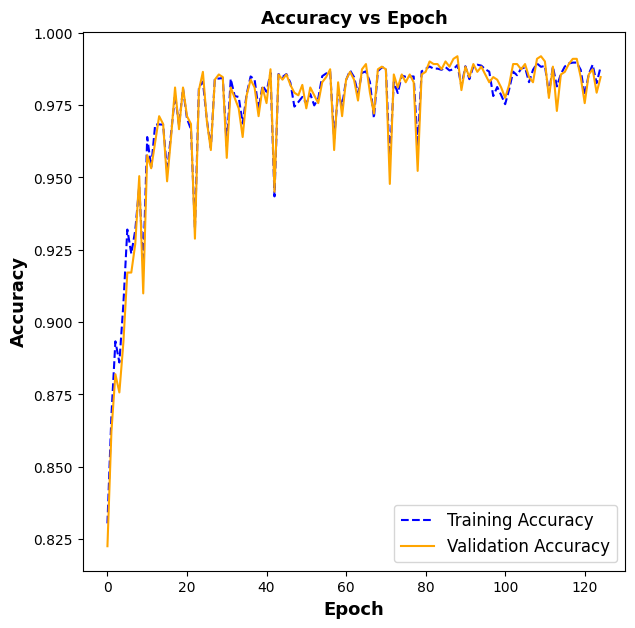

In [ ]:
import matplotlib.pyplot as plt
y1 = training_accuracy_values
y2 = validation_accuracy_values
x = []
for i in range(len(training_accuracy_values)):
  x.append(i)

plt.figure(figsize=(7,7), dpi=100)
plt.plot(x, y1, linestyle='--', color='blue', label='Training Accuracy')
plt.plot(x, y2, color='orange', label='Validation Accuracy')

plt.xlabel('Epoch',weight='bold',fontsize=13)
plt.ylabel('Accuracy',weight='bold',fontsize=13)
plt.title('Accuracy vs Epoch',weight='bold',fontsize=13)
legend_prop = {'weight':'bold'}
plt.legend(loc='lower right', frameon=True, fontsize=12)
plt.savefig("/content/drive/MyDrive/accuracy.eps")
plt.show()

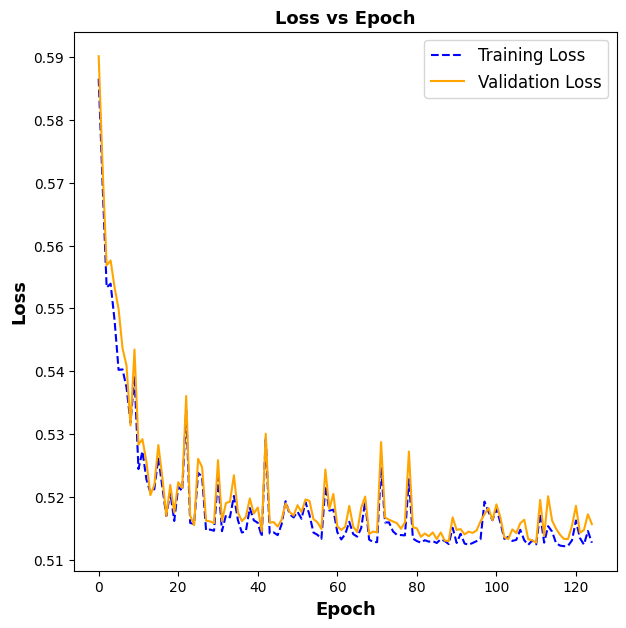

In [ ]:
y1 = training_loss_values
y2 = validation_loss_values
x = []
for i in range(len(training_loss_values)):
  x.append(i)

plt.figure(figsize=(7,7), dpi=100)
plt.plot(x, y1, linestyle='--', color='blue', label='Training Loss')
plt.plot(x, y2, color='orange', label='Validation Loss')

plt.xlabel('Epoch',weight='bold',fontsize=13)
plt.ylabel('Loss',weight='bold',fontsize=13)
plt.title('Loss vs Epoch',weight='bold',fontsize=13)
legend_prop = {'weight':'bold'}
plt.legend(loc='upper right', frameon=True, fontsize=12)
plt.savefig("/content/drive/MyDrive/loss.eps")
plt.show()

In [ ]:
print(f"Minimum testing loss     : {min(validation_loss_values)}")
print(f"Maximum testing accuracy : {max(validation_accuracy_values)}")

Minimum testing loss     : 0.5126861333847046
Maximum testing accuracy : 0.9918918918918919


In [ ]:
import sklearn
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def collect_metrics( y_true_test, y_pred_test):
  precision_patient_test =  precision_score(y_true_test, y_pred_test, pos_label=0)
  recall_patient_test =  recall_score(y_true_test, y_pred_test, pos_label=0)
  f1_patient_test = f1_score(y_true_test, y_pred_test, pos_label=0)
  bal_acc_patient_test = balanced_accuracy_score(y_true_test, y_pred_test)
  acc_test = accuracy_score(y_true_test, y_pred_test)
  return precision_patient_test, recall_patient_test, f1_patient_test, bal_acc_patient_test,acc_test

total_count = 0
total_correct = 0
logits_all = []
labels_all = []
for j in range(int(train_size / batch_size), int( complete_size/ batch_size) + 1):
    first = batch_size * j
    last = min(complete_size, batch_size * (j + 1))
    graph_indices = []
    batch_graph_list = {}
    for x in bands:
      batch_graph_list[x] = []
    batch_graph_valid = False
    batch_graph_size = 0
    batch_graph_labels = []


    for i in range(first, last):
        for x in bands: 
          g = graph_list[i][x]
          batch_graph_list[x].append(g)
        graph_indices.append(i)
        batch_graph_size += 1
        labels = extract_labels(i)
        batch_graph_labels.append(labels)
    batch_graph = {}
    
    if batch_graph_size > 0:
        for x in bands:
            batch_graph[x] = dgl.batch(batch_graph_list[x])
        labels_all = labels_all + batch_graph_labels
        batch_graph_labels = tf.convert_to_tensor(batch_graph_labels)

        logits = model( batch_graph )
        total_count += batch_graph_size
        logits_array = logits.numpy().tolist()
        logits_all = logits_all + logits_array

lst = []
logits_all_float = []
for i in range(len(logits_all)):
  logits_all_float.append(logits_all[i])
  logits_all[i]=math.floor(logits_all[i]+0.5)
  lst.append(labels_all[i])

lst = np.array(lst)
logits_array = np.array(logits_all)
logits_all_float = np.array(logits_all_float)
precision_patient_train, recall_patient_train, f1_patient_train, bal_acc_patient_train ,acc_test= collect_metrics(y_true_test=lst, y_pred_test=logits_all)

print(f"Testing patient metrics: accuracy: {acc_test:.5f}, precision: {precision_patient_train:.5f}, recall: {recall_patient_train:.5f}, f1: {f1_patient_train:.5f}, bal acc: {bal_acc_patient_train:.5f}")

cm1 = confusion_matrix(lst, logits_all)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
# print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Testing patient metrics: accuracy: 0.98378, precision: 0.97432, recall: 0.99476, f1: 0.98443, bal acc: 0.98344
Confusion Matrix : 
 [[569   3]
 [ 15 523]]
Sensitivity :  0.9947552447552448
Specificity :  0.9721189591078067


In [ ]:
np.save('/content/drive/MyDrive/logits_all_float',logits_all_float)

In [ ]:
np.save('/content/drive/MyDrive/lst',lst)

In [ ]:
#save logits_all_float   &&   lst
#save all the curves in .eps format in drive in some folder
#model save krdiye hai uper, best model save krna tha lekin last epoch wala ho rha chalta hai kya kr skte hai

[0.         0.00524476 1.        ] [0.         0.97211896 1.        ]
0.9834371019315257


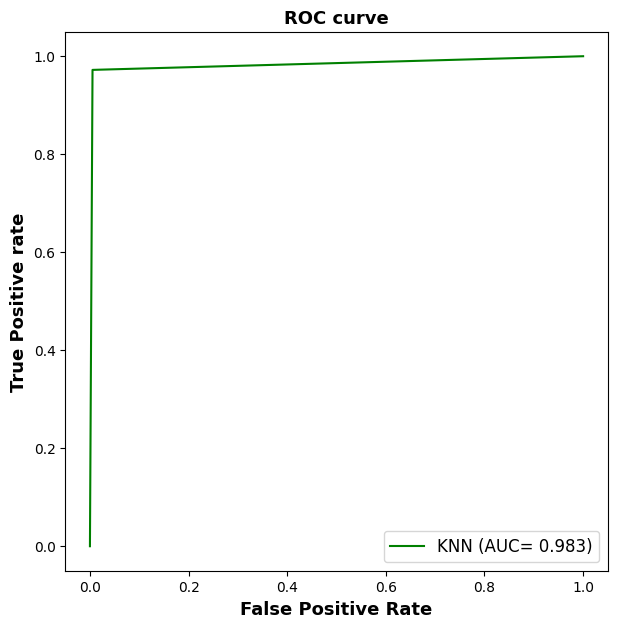

In [ ]:
from sklearn.metrics import roc_curve, auc
fprknn, tprknn, threshold= roc_curve(lst,logits_all)
auc_knn= auc(fprknn,tprknn)
print(fprknn,tprknn)
print(auc_knn)

plt.figure(figsize=(7,7), dpi=100)
plt.plot(fprknn, tprknn, linestyle='solid',color='green', label= 'KNN (AUC= %0.3f)' % auc_knn)
plt.title('ROC curve',weight='bold',fontsize=13)
plt.xlabel('False Positive Rate',weight='bold',fontsize=13)
plt.ylabel('True Positive rate',weight='bold',fontsize=13)
legend_prop = {'weight':'bold'}
plt.legend(loc='lower right', frameon=True, fontsize=12)
plt.savefig("/content/drive/MyDrive/ROC.eps")
plt.show()

[0.         0.00174825 0.00174825 0.0034965  0.0034965  0.00524476
 0.00524476 0.00699301 0.00699301 0.01048951 0.01048951 0.04370629
 0.04370629 0.0541958  0.0541958  0.08391608 0.08391608 0.16958042
 0.16958042 0.32342657 0.32342657 0.35664336 0.35664336 0.37762238
 0.37762238 0.51748252 1.        ] [0.         0.95910781 0.96282528 0.96282528 0.97211896 0.97211896
 0.9739777  0.9739777  0.97583643 0.97583643 0.9795539  0.9795539
 0.98141264 0.98141264 0.98327138 0.98327138 0.98513011 0.98513011
 0.98698885 0.98698885 0.98884758 0.98884758 0.99070632 0.99070632
 0.99256506 0.99256506 1.        ]
0.9908005563210023


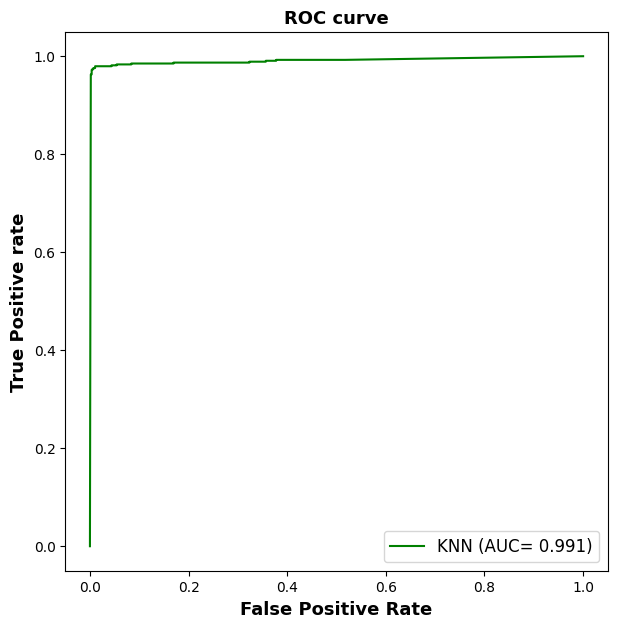

In [ ]:
from sklearn.metrics import roc_curve, auc
fprknn_f, tprknn_f, threshold_f= roc_curve(lst,logits_all_float)
auc_knn_f= auc(fprknn_f,tprknn_f)
print(fprknn_f,tprknn_f)
print(auc_knn_f)

plt.figure(figsize=(7,7), dpi=100)
plt.plot(fprknn_f, tprknn_f, linestyle='solid',color='green', label= 'KNN (AUC= %0.3f)' % auc_knn_f)
plt.title('ROC curve',weight='bold',fontsize=13)
plt.xlabel('False Positive Rate',weight='bold',fontsize=13)
plt.ylabel('True Positive rate',weight='bold',fontsize=13)
legend_prop = {'weight':'bold'}
plt.legend(loc='lower right', frameon=True, fontsize=12)
plt.savefig("/content/drive/MyDrive/ROC2.eps")
plt.show()

In [ ]:
end = time.time()
print((end-start)//60," minutes ",(end-start)-60*((end-start)//60)," seconds")

115.0  minutes  55.738298416137695  seconds
